## Conveyor Motor Reliability Problem

In this example, we study the **reliability of a conveyor motor** used in an industrial production line.  

<img src="Motor.png" alt="Conveyor Motor" width="500">

**Problem Statement:**  
The conveyor motor has a historical record of **50 failures per 10,000 operating hours**. We want to analyze:

1. The **failure rate** of the motor based on historical data.
2. The **probability that the motor will operate without failure** for **three standard 8-hour shifts**.
3. The **reliability curve** of the motor over time to visualize how its probability of survival decreases with increasing operating hours.

This analysis helps maintenance engineers plan preventive maintenance, estimate downtime risk, and improve overall reliability of the production line.

We model reliability with the exponential law:

$R(t) = e^{-\lambda t}$

where $\lambda$ is the failure rate (per hour).

Historical record: **50 failures per 10,000 hours** →
$\hat{\lambda} = 50/10{,}000 = 0.005 \text{ failures/hour}$

In [1]:
import math

failures = 50
hours_observed = 10_000

lam = failures / hours_observed  # failure rate per hour

t_hours = 3 * 8  # 3 shifts of 8 hours = 24h
R_t = math.exp(-lam * t_hours)
MTTF = 1/lam

print(f"Failure rate λ = {lam:.4f} failures/hour")
print(f"MTTF = {MTTF:.1f} hours")
print(f"Reliability for {t_hours}h (3 shifts): {R_t:.4f}")

Failure rate λ = 0.0050 failures/hour
MTTF = 200.0 hours
Reliability for 24h (3 shifts): 0.8869


## Reliability Curve

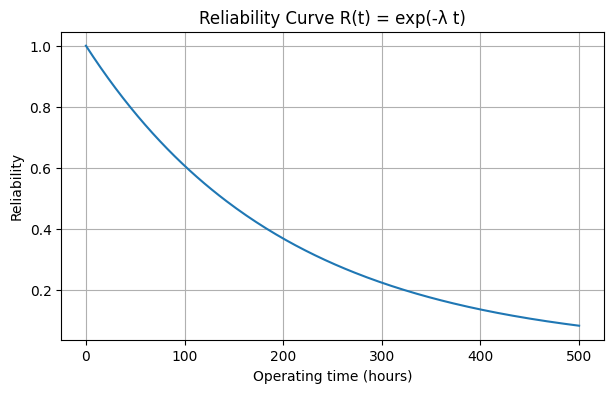

In [2]:
import numpy as np
import matplotlib.pyplot as plt

times = np.linspace(0, 500, 201)
reliability = np.exp(-lam * times)

plt.figure(figsize=(7,4))
plt.plot(times, reliability)
plt.title("Reliability Curve R(t) = exp(-λ t)")
plt.xlabel("Operating time (hours)")
plt.ylabel("Reliability")
plt.grid(True)
plt.show()

## Reliability for multiple shift durations

In [3]:
shift_hours = 8
for shifts in [1,2,3,5]:
    t = shifts*shift_hours
    print(f"R({shifts} shift(s), {t}h) = {math.exp(-lam*t):.4f}")

R(1 shift(s), 8h) = 0.9608
R(2 shift(s), 16h) = 0.9231
R(3 shift(s), 24h) = 0.8869
R(5 shift(s), 40h) = 0.8187


## reliability Python Library

The [`reliability`](https://reliability.readthedocs.io/en/latest/index.html) Python library is a specialized tool for **reliability engineering and survival analysis**. It allows engineers and analysts to:

- Model **time-to-failure** data using common probability distributions (Exponential, Weibull, Normal, etc.).
- **Fit distributions** to historical failure data and estimate distribution parameters.
- Compute **reliability functions** (probability that a system or component survives beyond a given time) and **failure probabilities**.
- Visualize **survival functions, hazard rates, and probability plots** for better understanding of reliability behavior.
- Perform **simulation and prediction** for maintenance planning and risk assessment.

This library is particularly useful in **industrial applications**, where understanding equipment reliability is crucial for scheduling preventive maintenance, reducing downtime, and optimizing operational performance.


In [4]:
## Install reliability library if not installed
# !pip install reliability --quiet

In [5]:
# Imports
from reliability.Distributions import Exponential_Distribution
from reliability.Fitters import Fit_Exponential_1P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt
import numpy as np

Failure rate λ = 0.005000 per hour
Results from Fit_Exponential_1P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: L-BFGS-B
Failures / Right censored: 20/0 (0% right censored) 

Parameter  Point Estimate  Standard Error   Lower CI   Upper CI
   Lambda      0.00548278      0.00122599 0.00353726 0.00849837
 1/Lambda         182.389         40.7834     117.67    282.705 

Goodness of fit    Value
 Log-likelihood -124.123
           AICc  250.468
            BIC  251.241
             AD 0.896477 

Reliability for 3 shifts (24 hours): 0.8767
Probability of failure in 3 shifts: 0.1233


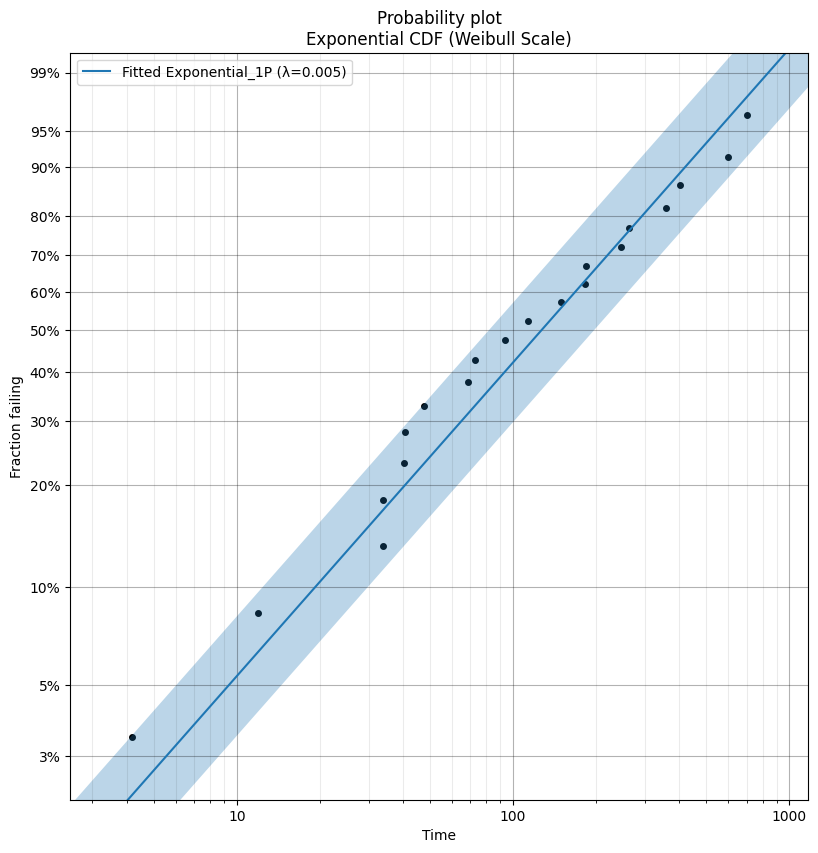

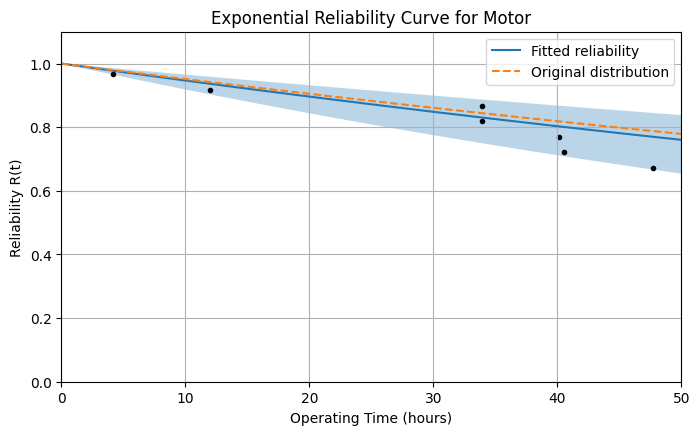

In [6]:
# Historical data
failures = 50
hours_operated = 10000

# Compute failure rate λ
lambda_failure = failures / hours_operated
print(f"Failure rate λ = {lambda_failure:.6f} per hour")

# Create Exponential distribution object
motor = Exponential_Distribution(Lambda=lambda_failure)

# Generate some sample failures (optional, to illustrate)
data = motor.random_samples(20, seed=42)

# Fit Exponential distribution to sample data (illustration)
fit = Fit_Exponential_1P(failures=data)

# Reliability for 3 shifts (3 * 8 hours)
shift_hours = 8
total_time = 3 * shift_hours
R = fit.distribution.SF(total_time)  # <- pass total_time directly, not t=total_time
print(f"Reliability for 3 shifts ({total_time} hours): {R:.4f}")
print(f"Probability of failure in 3 shifts: {1-R:.4f}")

# Plot reliability curve
time = np.linspace(0, 50, 500)  # 0 to 50 hours
plt.figure(figsize=(8,5))
fit.distribution.SF(time, label='Fitted reliability')  # pass array of times
motor.SF(time, linestyle='--', label='Original distribution')  # original exponential
plot_points(failures=data, func='SF')  # overlay sample points
plt.xlabel('Operating Time (hours)')
plt.ylabel('Reliability R(t)')
plt.title('Exponential Reliability Curve for Motor')
plt.grid(True)
plt.legend()
plt.show()

### Conveyor Motor Reliability Analysis Results

The **failure rate** of the conveyor motor was estimated based on 20 observed failures over historical operating hours. Key findings from the **Exponential 1-Parameter fit (95% Confidence Interval)** are summarized below:

- **Failure rate (λ):** 0.005 per hour  
  This means that, on average, the motor experiences **0.005 failures per hour of operation**.

- **Analysis method:** Maximum Likelihood Estimation (MLE) with **L-BFGS-B optimizer**.  
  All 20 observations were failures (0% right-censored), meaning all motors failed within the observed time.

- **Parameter estimates:**
  - **Lambda (λ):** 0.00548 ± 0.00123 (95% CI: 0.00354 – 0.00850)  
    This is the estimated rate of failure per hour.
  - **Mean time between failures (1/λ):** 182.4 hours ± 40.8 (95% CI: 117.7 – 282.7)  
    On average, the motor operates **about 182 hours before failing**.

- **Goodness of fit:**
  - Log-likelihood: -124.123  
  - AICc: 250.468  
  - BIC: 251.241  
  - Anderson-Darling (AD): 0.896  
  These metrics indicate how well the exponential distribution fits the observed data.

- **Reliability for 3 shifts (24 hours):** 0.8767  
  This means there is an **87.7% probability** that the motor will operate without failure over three standard 8-hour shifts.

- **Probability of failure in 3 shifts:** 0.1233  
  Conversely, there is a **12.3% chance** that the motor will fail during this time period.

**Interpretation:**  
The conveyor motor has a **high probability of surviving a standard workday**, but preventive maintenance may be needed to reduce the risk of unexpected downtime. The exponential model provides a simple yet useful estimate of reliability over time for operational planning.
